<a href="https://colab.research.google.com/github/HotuRam/Phone_laptop_desktop_classifier/blob/main/Phone_laptop_desktop_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Phone_laptop_desktop_classifier

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book() 

#if this cell is not working restart run time then execute the cell it will work try it

Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
# import fastai

In [4]:
# from fastai import *

In [5]:
Object_types = 'phone','laptop','desktop','keypad_phone'

In [6]:
path = Path('/content/gdrive/MyDrive/phone_desktop_laptop_classifier') #make sure you gave currect path from gdrive

In [7]:
Object_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = Object_types.dataloaders(path)

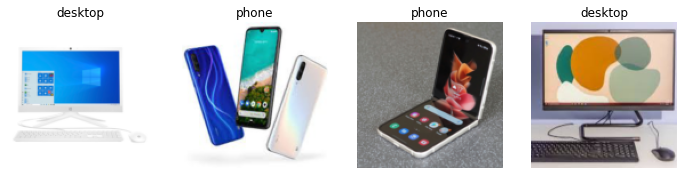

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

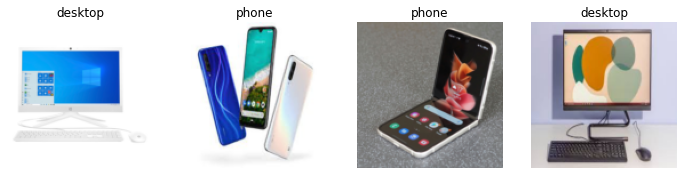

In [10]:
Object_types = Object_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Object_types.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [11]:
# Object_types = Object_types.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dls = Object_types.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

# Squish method is more efficient then pad method

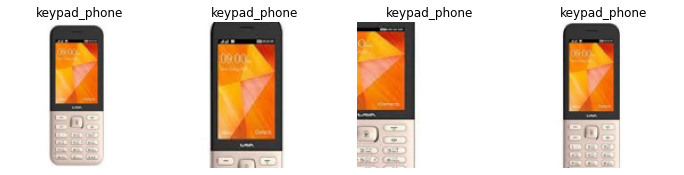

In [12]:
Object_types = Object_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Object_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

# cropmethod avoid the overfitting 

### The batch size is by default bs = 64. If you change that value for a lower one, it will work.

## dls = Object_types.dataloaders(path,bs=5)


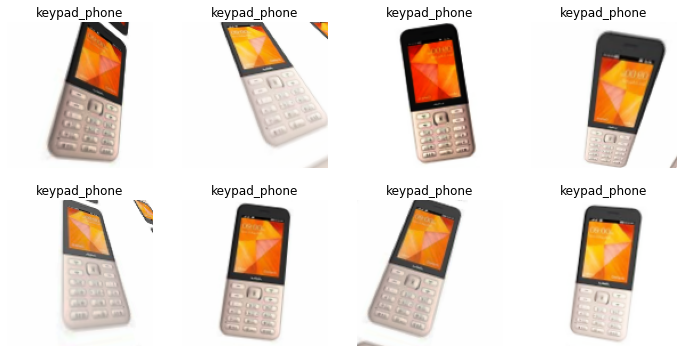

In [13]:
Object_types = Object_types.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = Object_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [14]:
Object_types = Object_types.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = Object_types.dataloaders(path)

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.090076,1.246058,0.500000,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.870963,0.767887,0.265625,00:05
1,0.683242,0.350882,0.125000,00:06
2,0.506801,0.179033,0.093750,00:05
3,0.410132,0.153456,0.046875,00:06


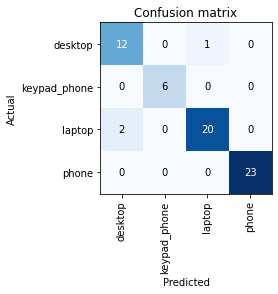

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

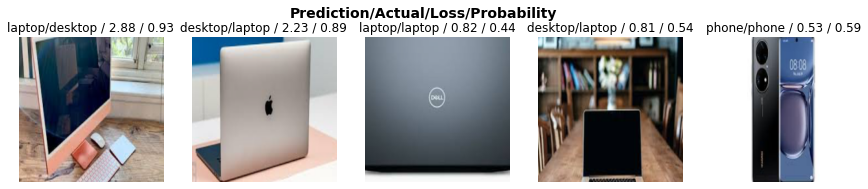

In [17]:
interp.plot_top_losses(5, nrows=1)

In [18]:
from fastai.vision.widgets import *

In [19]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [20]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [21]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [22]:
learn.export()

In [23]:
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

In [24]:
learn_inf = load_learner(path/'export.pkl')

In [25]:
learn_inf.predict('/content/gdrive/MyDrive/phone_desktop_laptop_classifier/laptop/laptop100.jpg')

('laptop',
 TensorBase(2),
 TensorBase([2.8514e-03, 7.0331e-04, 9.9308e-01, 3.3660e-03]))

In [26]:
learn_inf.dls.vocab

['desktop', 'keypad_phone', 'laptop', 'phone']

## Creating a Notebook App from the Model


In [27]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [28]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/phone_desktop_laptop_classifier/laptop/laptop100.jpg'])

In [29]:
img = PILImage.create(btn_upload.data[-1])

In [30]:
# hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [31]:
pred,pred_idx,probs = learn_inf.predict(img)

In [32]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: laptop; Probability: 0.9931')

In [33]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [34]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [35]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [36]:
VBox([widgets.Label('Select your object!'),
      btn_upload, btn_run, out_pl, lbl_pred])